## Descending Into Neural Networks

Over the next three weeks, I will be slowly introducing us to the internal mechanics of neural networks. Each week there will be a few lessons leading toward a deeper understanding of this topic. I will try to connect them to other material that we will be studying, but the primary purpose is to gradually learn this very complicated topic. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Iterative Techniques in General

Gradient Descent is a technique belonging to a larger family of iterative problem solvers. 

**Iteration** means to repeat a process with the aim of approaching a desired result. Each repetition of the process, also called an **iteration** is used as the starting point for the next iteration. 

### The Good News
You have been doing this already.

In [2]:
a = 0
for i in range(3):
    a += .1
    print a

0.1
0.2
0.3


## One of the Oldest Iterative Techniques -  Newton's Method

**Domain/Data:** This problem comes from the study of functions and typically will be applied to a polynomial function of a single variable. Here we will look at 

$$f(x) = x^3 - 6x^2 + 7x + 3$$

In [3]:
f = lambda x: x**3 - 6*x**2 + 7*x + 3

#### Problem Statement
Given polynomial function of a single variable, we seek the **roots** of the function i.e. the values of $x$ for which the function evaluates to 0.

$$x: f(x) = 0$$

#### Solution Statement 
In order to solve this problem, we will use Newton's Method (or the Newton-Raphson Technique) to find successively better approximations to the roots.

_Newton's Method_
1. Visualize the function and find a guess that is "close" to the root
2. Guess a value for the root, $x_0$.
3. If the initial guess is close, we can find a better approximation

   $$x_1 = x_0 - \frac{f(x_0)}{f'(x_0)}$$
   
4. Repeat until a sufficiently accurate value is reached.

   $$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$

In order to handle the derivative of our function, we will use the numerical approximation, the **difference quotient**

$$f'(x) \approx \frac{f(x+h) - f(x)}{h}$$

This should be sufficiently accurate for small enough values of $h$.

In [4]:
def difference_quotient(f, x, h=1E-10):
    return float((f(x + h) - f(x)) / h)

In [5]:
def newtons_method_iteration(f, x):
    return x - (f(x)/difference_quotient(f, x))

**Metric:** In order to evaluate the success of our root finding, we will examine the absolute error of the root approximation, where

$$\text{err}(x_{est}) = \rvert f(x_{est}) \rvert$$

We can use this estimate because we expect the value of $f(x_{est}$ to be zero.

In [6]:
nm_error = lambda f, x: np.abs(f(x))

**Benchmark:** We will set an error value of $10^{-10}$. When our error is less than this, we can stop iterating. 

---

#### Visualize the function

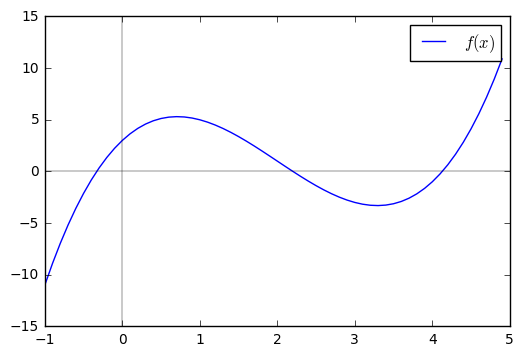

In [7]:
independent_values = np.arange(-1,5,0.1)
dependent_values = f(independent_values)

plt.plot(independent_values, 
         dependent_values, 
         label='$f(x)$')

plt.axvline(c='black', linewidth=0.3)
plt.axhline(c='black', linewidth=0.3)
plt.legend()

#### Find the First Root

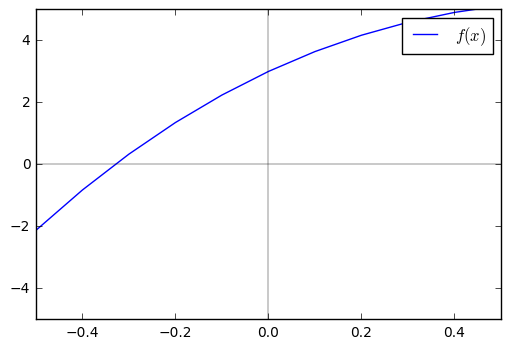

In [8]:
plt.plot(independent_values, 
         dependent_values, 
         label='$f(x)$')

plt.xlim(-.5,.5)
plt.ylim(-5,5)
plt.axvline(c='black', linewidth=0.3)
plt.axhline(c='black', linewidth=0.3)
plt.legend()

##### Initial Guess
Try $x=0$.

##### First Iteration

In [9]:
x_1 = newtons_method_iteration(f, 0)
x_1

-0.4285713931112725

##### Five More Iterations

In [10]:
x_est = x_1
for i in range(5):
    x_est = newtons_method_iteration(f, x_est)
    print x_est

-0.335553542958
-0.33007733937
-0.330058739787
-0.330058739568
-0.330058739568


#### Iterations & Error

In [11]:
x_est = 0
errors = []
for i in range(6):
    x_est = newtons_method_iteration(f, x_est)
    error = nm_error(f, x_est)
    errors.append(error)
    print "{:0.10f} {:0.10f} ".format(x_est, error)

-0.4285713931 1.1807575674 
-0.3355535430 0.0622339290 
-0.3300773394 0.0002099481 
-0.3300587398 0.0000000025 
-0.3300587396 0.0000000000 
-0.3300587396 0.0000000000 


#### Plotting the Error

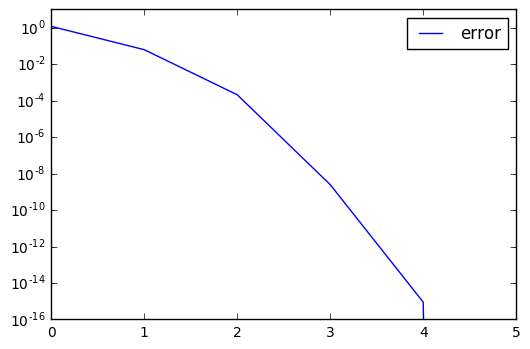

In [12]:
plt.plot(range(6), errors, label='error')

plt.yscale('log')
plt.legend()

#### Plotting the Guesses

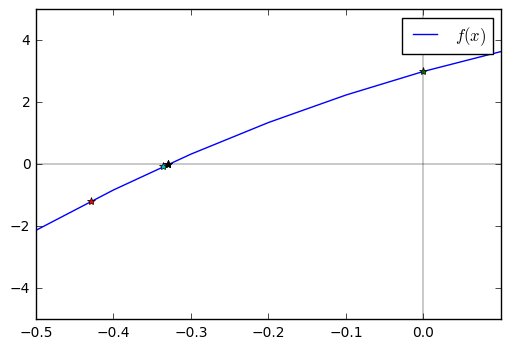

In [13]:
plt.plot(independent_values, 
         dependent_values, 
         label='$f(x)$')

x_est = 0
for i in range(6):
    plt.plot(x_est, f(x_est), '*')
    x_est = newtons_method_iteration(f, x_est)

plt.xlim(-.5,.1)
plt.ylim(-5,5)
plt.axvline(c='black', linewidth=0.3)
plt.axhline(c='black', linewidth=0.3)
plt.legend()

### Completing the Problem

We found the first root, $x_1=-0.3300587396$.

We also have a process for finding the other two.

##### Visualize

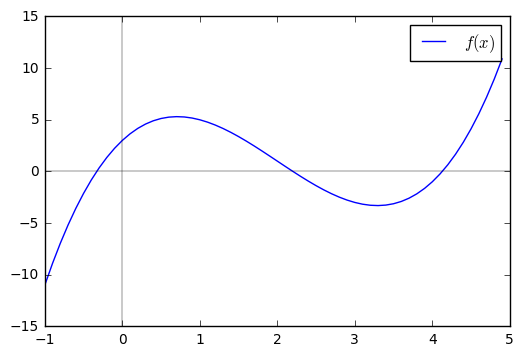

In [14]:
independent_values = np.arange(-1,5,0.1)
dependent_values = f(independent_values)

plt.plot(independent_values, 
         dependent_values, 
         label='$f(x)$')

plt.axvline(c='black', linewidth=0.3)
plt.axhline(c='black', linewidth=0.3)
plt.legend()

##### Make an Initial Guess, the Iterate
We will guess $x_2=2$ and $x_3=4$.

In [15]:
def find_roots(function, x_initial, iterations=6):
    x_estimate = x_initial
    x_estimates = []
    errors = []
    for i in range(iterations):
        x_estimate = newtons_method_iteration(f, x_estimate)
        x_estimates.append(x_estimate)
        
        error = nm_error(f, x_estimate)
        errors.append(error)
    
    return x_estimates, errors

In [20]:
root_two_ests, root_two_errs = find_roots(f, 2, iterations=3)
for x_est, error in zip(root_two_ests, root_two_errs):
    print "{:0.10f} {:0.10f} ".format(x_est, error)

2.1999999835 0.0080000808 
2.2016393537 0.0000015710 
2.2016396757 0.0000000000 


In [21]:
root_three_ests, root_three_errs = find_roots(f, 4, iterations=4)
for x_est, error in zip(root_three_ests, root_three_errs):
    print "{:0.10f} {:0.10f} ".format(x_est, error)

4.1428574936 0.1253675091 
4.1285716800 0.0013111981 
4.1284190811 0.0000001485 
4.1284190638 0.0000000000 


### Solution
 

We found all three roots:

\begin{align}
x_1 &= -0.3300587396\\
x_2 &= 2.2016396757\\
x_3 &= 4.1284190638\\
\end{align}

These roots were found and tested to be within the selected tolerance of $10^{-10}$.


---

![](https://upload.wikimedia.org/wikipedia/commons/e/e0/NewtonIteration_Ani.gif)

---

---

# The Gradient

## The Derivative

The **derivative** of a function of a **single** variable is meaure of the rate at which the output of the function is changing with respect to the input. 

<img src="assets/Wiki_slope_in_2d.png" width="300px">

For a linear function, this is the classic **rise over run** and when written 

$$f(x) = \beta_1x+\beta_0$$

the derivative of $f(x)$ is $\beta_1$ and is written

$$f'(x) = \beta_1$$

This is also called **slope**.

For more complicated functions, the derivative takes on a more complicated form. 

Earlier, we estimated the derivative using the **difference quotient**. 

$$f'(x) \approx \frac{f(x+h) - f(x)}{h}$$

Rather than finding our derivatives analytically, we are going to continue to use this estimate.

In [22]:
def difference_quotient(f, x, h=1E-10):
    return float((f(x + h) - f(x)) / h)

### The derivative of a constant is zero.

If $f(x)=a$ where $a\in\mathbb{R}$ i.e. $a$ is a number

$$f'(x)=0$$

This is very intuitive. The derivative is a rate of change. If a function is constant, it is not changing, therefore the rate of change is zero.


## The Derivative of a Multi-Variable Function

### The Bad News

The vast majority of the functions with which we will be working will not be functions of single variables.

Consider the following function

$$f(x,y) = x^2 + y^2$$

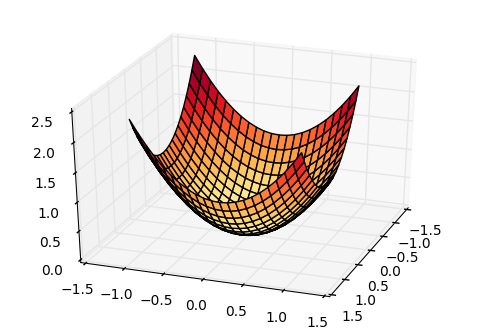

In [23]:
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure()
ax = fig.gca(projection='3d')

independent_values = np.arange(-1.1, 1.1, 0.1)
X, Y = np.meshgrid(independent_values,
                   independent_values)

Z = X**2 + Y**2

surf = ax.plot_surface(X, Y, Z, 
                       rstride=1, 
                       cstride=1, 
                       cmap='YlOrRd')
ax.view_init(30, 20)

We can no longer think of the derivative of this function as before. 

The function itself evaluates to a single value, in this case the $z$-axis or height of the plot above.

But it is a function of two variables. If we think of moving along the surface, we can move in two directions.

Our derivative is going to need a value in each direction. 

The derivative of $f(x,y)$ is going to be a vector with two values. 

The vector of these values, one for each variable in the function, is the **Gradient**.

#### The Partial Derivative of a Multi-Variable Function

The partial derivative of a multi-variable function is the derivative of the function with respect to a single variable **with all other variables held constant**.

Consider the bowl,

$$f(x,y) = x^2 + y^2$$

To find the partial derivative of $f$ with respect to $x$, we hold $y$ constant.

$$\partial f_x = 2x$$

We lose the $y$ term because $y$ is constant with respect to $x$ and the derivative of a constant is zero.

By the same token 

$$\partial f_y = 2y$$

Armed with these two partial derivatives, we have our gradient

$$\nabla f = (2x, 2y)$$

$\nabla$ is a symbol called "nabla" and means "the gradient of".

### Define our function and treat its inputs as a vector

In [24]:
f = lambda (x, y): x**2 + y**2

### Define  a partial difference quotient

In [26]:
def partial_difference_quotient(f, v, i, h=10E-10):
    # add h to just the ith element of v
    w = [v_j + (h if j == i else 0) 
         for j, v_j in enumerate(v)]
    
    return (f(w) - f(v)) / h

### Define the gradient

In [27]:
def grad(f, v, h=10E-10):
    return [partial_difference_quotient(f, v, i)
            for i, _ in enumerate(v)]

In [28]:
def plot_grad(f, v):
    this_grad = grad(f, v)
    plt.arrow(v[0], v[1], 
              this_grad[0]-v[0], this_grad[1]-v[1],
              linewidth=0.1,
              head_width=0.1,
              head_length=0.1)

In [29]:
print grad(f, (0,.2))
print grad(f, (.1,.12))
print grad(f, (.3,.2))

[0.0, 0.3999999984016789]
[0.19999999920083944, 0.24000000251045425]
[0.5999999941330714, 0.4000000053405728]


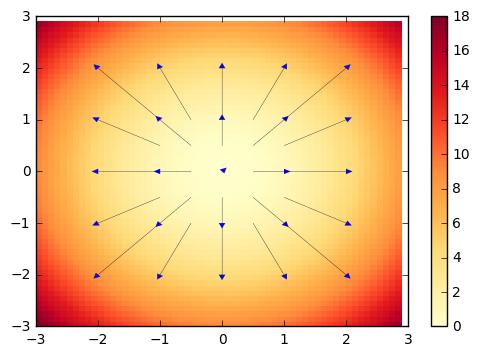

In [30]:
X = np.arange(-3,3,.1)
Y = np.arange(-3,3,.1)
Z = [[x_i**2 + y_i**2 for x_i in X] for y_i in X]
plt.pcolormesh(X, Y, Z, cmap='YlOrRd')
plt.colorbar() #need a colorbar to show the intensity scale

for x_i in [-1,-0.5,0,0.5,1]:
    for y_i in [-1,-0.5,0,0.5,1]:
        plot_grad(f, (x_i, y_i))



## Properties of the Gradient

1. The direction of the gradient is the direction of the steepest slope at a given point i.e. the direction of the greatest increase of a function.
1. The steepness of the slope at that point is the magnitude (or length) of the gradient vector.
1. The opposite of the gradient i.e. $-\nabla f$ will point in the direction of the greatest decrease of a function.
   - another way to say this is that $f(a)$ will decrease the fastest at $a$ in the direction of the negative gradient

### A Field of Gradients

It is helpful to visualize the gradient of a function as a field of gradients. 

Here we visualize a field of negative gradients.

![](assets/grad.png)

One can imagine dropping a marble onto this surface. In an ideal situation, it will trace a path described by the gradient.

![](assets/gradient-descent.png)

We can use this property of the gradient to our advantage when attempting to minimize a function, by simply following the path of greatest descent from every point at which we stand. 

# Optimization of a Function via Gradient Descent

### Domain and Data

This problem comes from the field of optimization. We will typically be given a multi-variable function. Here we consider a bowl, 

$$f(x,y) = x^2 + y^2$$

Henceforth, we will refer to $x$ and $y$ as $x_1$ and $x_2$ and together they are

$$\mathbf x = (x_1, x_2)$$

with

$$f(\mathbf x) = x_1^2 + x_2^2$$

In [ ]:
f = lambda v: sum([x_i**2 for x_i in v])

### Problem Statement
We seek a local minimum to a multi-variable function, which is to say, we seek the values of our input variable that will yield a minimal value of our function.

### Solution Statement

In simple cases, the minimum of a function can be found by setting the derivative equal to zero and solving analytically.

To solve this problem, we use an iterative optimization algorithm known as the Gradient Descent. 

_Gradient Descent_
1. (Optional) Visualize the function
2. Choose a learning rate for the descent e.g. $\gamma=0.1$ 
3. Randomly select an initial vector value for our function e.g. 

$$\mathbf x_0 = (.332,.562)$$
   
4. Find the gradient of the $f$ at $\mathbf x$ i.e. $\nabla f(\mathbf{x}_0)$

5. $\mathbf{x}_1$ will be a better approximation to a minima, where $\mathbf{x}_1$ is

   $$\mathbf{x}_1 = \mathbf{x}_0 - \gamma \nabla f(\mathbf{x}_0)$$
   
4. Repeat until a sufficiently accurate value is reached.

   $$\mathbf{x}_{n+1} = \mathbf{x}_n - \gamma \nabla f(\mathbf{x}_n)$$

In [31]:
def grad(f, v, h=10E-10):
    return np.array([partial_difference_quotient(f, v, i)
                     for i, _ in enumerate(v)])

In [32]:
def gradient_descent_iteration(f, v, gamma=0.1):
    return v - gamma*grad(f,v)

### Metric

To measure the performance of our descent we will examine the difference between successive steps. When the difference falls below a certain threshold, we can consider the descent to have settled into a minimum.


In [33]:
def grad_magnitude(gradient):
    return np.sqrt(sum([x_i**2 for x_i in gradient]))
    
def grad_precision(grad_1, grad_2):
    return np.abs(grad_magnitude(grad_2)-
                  grad_magnitude(grad_1))

### Benchmark

We will set this difference at $10^{-2}$.

#### Visualize the Function

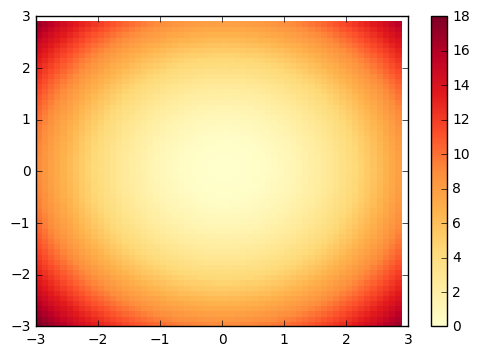

In [34]:
X_1 = np.arange(-3,3,.1)
X_2 = np.arange(-3,3,.1)
F_X = [[x_1_i**2 + x_2_i**2 
        for x_1_i in X_1] 
       for x_2_i in X_2]

plt.pcolormesh(X_1, X_2, F_X, cmap='YlOrRd')
plt.colorbar() #need a colorbar to show the intensity scale



#### Initial Guess

In [35]:
x_0 = np.array((.332,.562))

#### First Iteration

In [36]:
x_1 = gradient_descent_iteration(f, x_0)
x_1

array([ 0.2656    ,  0.44960001])

(-0.6, 0.6)

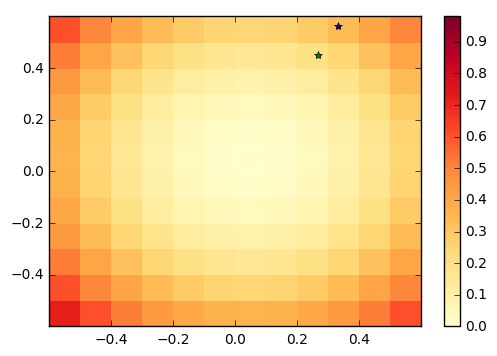

In [37]:
X_1 = np.arange(-.7,.7,.1)
X_2 = np.arange(-.7,.7,.1)
F_X = [[x_1_i**2 + x_2_i**2 
        for x_1_i in X_1] 
       for x_2_i in X_2]

plt.pcolormesh(X_1, X_2, F_X, cmap='YlOrRd')
plt.plot(x_0[0], x_0[1], '*')
plt.plot(x_1[0], x_1[1], '*')

plt.colorbar() #need a colorbar to show the intensity scale
plt.ylim(-.6,.6)
plt.xlim(-.6,.6)

#### Five More Iterations

In [38]:
x_est = x_1
for i in range(5):
    x_est = gradient_descent_iteration(f, x_est)
    print x_est


[ 0.21248     0.35968001]
[ 0.169984  0.287744]
[ 0.1359872  0.2301952]
[ 0.10878976  0.18415616]
[ 0.08703181  0.14732493]


#### Iterations & Gradient Precision

In [45]:
x_est = np.array((.332,.332))
gd_precs = []
for i in range(20):
    last_x_est = x_est
    x_est = gradient_descent_iteration(f, x_est)
    gd_prec = grad_precision(last_x_est, x_est)
    gd_precs.append(gd_prec)
    print "{:30} {:0.10f} ".format(x_est, gd_prec)

[ 0.2656  0.2656]              0.0939037836 
[ 0.21248  0.21248]            0.0751230245 
[ 0.169984  0.169984]          0.0600984192 
[ 0.1359872  0.1359872]        0.0480787354 
[ 0.10878976  0.10878976]      0.0384629877 
[ 0.08703181  0.08703181]      0.0307703909 
[ 0.06962545  0.06962545]      0.0246163124 
[ 0.05570036  0.05570036]      0.0196930500 
[ 0.04456028  0.04456028]      0.0157544400 
[ 0.03564823  0.03564823]      0.0126035519 
[ 0.02851858  0.02851858]      0.0100828415 
[ 0.02281487  0.02281487]      0.0080662732 
[ 0.01825189  0.01825189]      0.0064530186 
[ 0.01460151  0.01460151]      0.0051624149 
[ 0.01168121  0.01168121]      0.0041299319 
[ 0.00934497  0.00934497]      0.0033039455 
[ 0.00747597  0.00747597]      0.0026431564 
[ 0.00598078  0.00598078]      0.0021145251 
[ 0.00478462  0.00478462]      0.0016916201 
[ 0.0038277  0.0038277]        0.0013532961 


#### Plotting the Gradient Precision

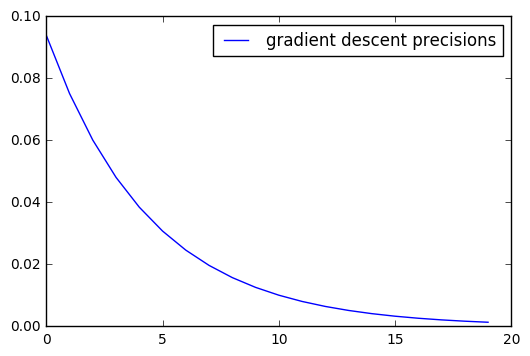

In [46]:
plt.plot(range(len(gd_precs)), gd_precs, label='gradient descent precisions')
plt.legend()

#### More Iterations

In [51]:
x_est = np.array((.45,.562))
x_ests = [x_est]
gd_precs = []
for i in range(13):
    last_x_est = x_est
    x_est = gradient_descent_iteration(lambda (x, y): 3*x**2, x_est)
    x_ests.append(x_est)
    gd_prec = grad_precision(last_x_est, x_est)
    gd_precs.append(gd_prec)
    print "{:30} {:0.10f} ".format(x_est, gd_prec)

[ 0.36        0.44960001]      0.1439922114 
[ 0.288       0.35968001]      0.1151937816 
[ 0.2304    0.287744]          0.0921550271 
[ 0.18432    0.2301952]        0.0737240197 
[ 0.147456    0.18415616]      0.0589792162 
[ 0.1179648   0.14732493]      0.0471833705 
[ 0.09437184  0.11785994]      0.0377466970 
[ 0.07549747  0.09428795]      0.0301973576 
[ 0.06039798  0.07543036]      0.0241578859 
[ 0.04831838  0.06034429]      0.0193263090 
[ 0.0386547   0.04827543]      0.0154610470 
[ 0.03092376  0.03862035]      0.0123688376 
[ 0.02473901  0.03089628]      0.0098950701 


#### Plotting the Descent

(-0.6, 0.6)

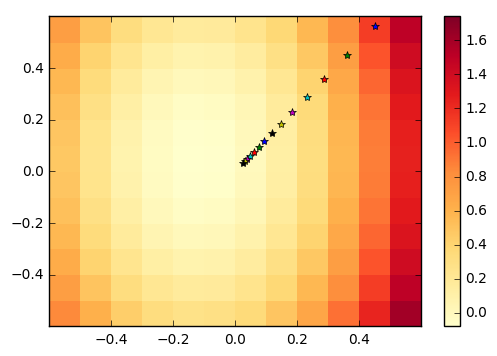

In [57]:
X_1 = np.arange(-.7,.7,.1)
X_2 = np.arange(-.7,.7,.1)
F_X = [[3*x_1_i**2 + x_1_i + x_2_i**2 
        for x_1_i in X_1] 
       for x_2_i in X_2]

plt.pcolormesh(X_1, X_2, F_X, cmap='YlOrRd')

for x in x_ests:
    plt.plot(x[0], x[1], '*')

plt.colorbar() #need a colorbar to show the intensity scale
plt.ylim(-.6,.6)
plt.xlim(-.6,.6)